In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Class 19: Decisions and Uncertainty

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
observed_average = scores.group('Section', np.average).where('Section', 3).column('Midterm average').item(0)
observed_average

13.666666666666666

In [13]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
10,12
11,14
6,9
6,21
8,15
12,11
7,17
10,23
1,21
4,11


In [14]:
np.average(random_sample.column('Midterm'))

14.518518518518519

In [15]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [16]:
# Simulate 10,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(10000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

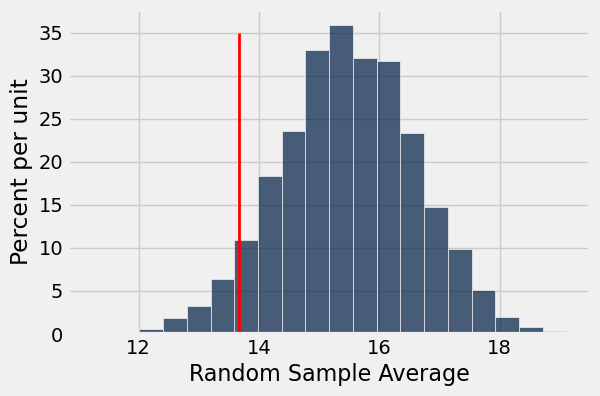

In [17]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.plot([observed_average, observed_average], [0, .35], color='red', lw=2);

In [18]:
sum(sample_averages <= observed_average) / 10000

0.056899999999999999

In [19]:
# 5% of 10,000 = 500

five_percent_point = averages_tbl.sort(0).column(0).item(500)
five_percent_point

13.592592592592593

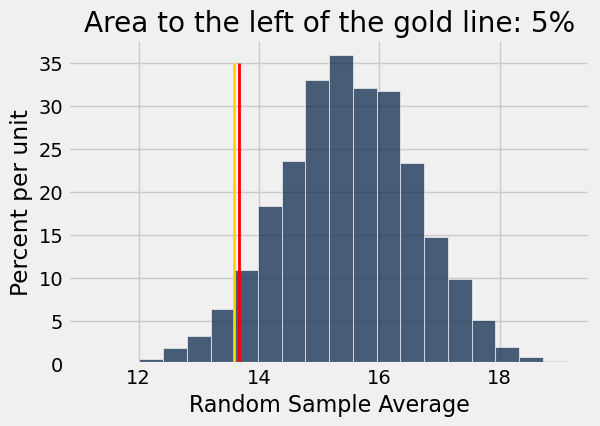

In [20]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');
plots.plot([observed_average, observed_average], [0, .35], color='red', lw=2);